#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [3]:
df_W=pd.read_csv('201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('201506-citibike-tripdata.csv')


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [4]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

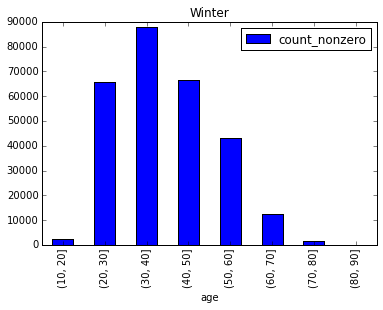

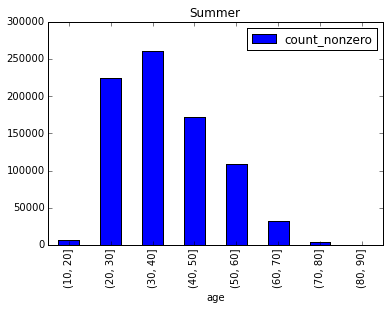

In [5]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
    

how do they look? what should I expect? setting some expectation is useful as a sanity check!

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [7]:
#compare to normal
print W_age_dist
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

          count_nonzero
age                    
(10, 20]           2474
(20, 30]          65630
(30, 40]          87790
(40, 50]          66419
(50, 60]          43316
(60, 70]          12548
(70, 80]           1551
(80, 90]             58
winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=0.99999637418970078, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.9999987788873137, pvalue=0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

#The data structure above of W_age_dist shall NOT be fitted in the K-S test.  
#It only contains 8 observations of those categories.

In [8]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [9]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [12]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=319324425.0, pvalue=nan)
summer, normal fit KstestResult(statistic=107543975.0, pvalue=nan)


##TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

#As the above tests are WRONG, I change the data to the right structure used for test

In [19]:
test = df_W.age    #for the K-S test, no matter the scale is, the result remains the same
test = test[~numpy.isnan(test)]
test1 = df_S.age 
test1 = test1[~numpy.isnan(test1)]
ksW=scipy.stats.kstest(test, 'gamma', args=(35,))
ksS=scipy.stats.kstest(test1, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS


winter, normal fit KstestResult(statistic=0.30011019784795445, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.25256012716961351, pvalue=0.0)


#A-D test

In [42]:
adW = scipy.stats.anderson(test, dist='logistic')
adS = scipy.stats.anderson(test1, dist='logistic')

print "winter, logistic fit", adW
print "summer, logistic fit", adS

winter, logistic fit AndersonResult(statistic=2893.1871235196595, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
summer, logistic fit AndersonResult(statistic=10830.741695157136, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


#The statistic is much higher than the critical value of the 0.5% significant value. So Null is rejected, it's NOT derived from logistic distribution.  
#Question: Why it's no need to input parameters for logistic distribution(it should contain 2 parameters)

#K-L test

In [35]:
distpdf_n, mybins_n, = np.histogram(test, density=True)
print distpdf_n
print mybins_n[1]-mybins_n[0],mybins_n[2]-mybins_n[1]

[  7.69851817e-03   3.41921379e-02   2.64171704e-02   2.04880610e-02
   9.45649533e-03   1.59864820e-03   9.82409511e-05   7.50203627e-06
   3.21515840e-06   4.00108601e-05]
10.0 10.0


In [36]:
bincenters_n = mybins_n[:-1] + 5

In [37]:
print "winter on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))

winter on normal inf


#The entropy is infinite, so it's NOT a normal distribution.  
#Option:


#splitting the winter sample by up- and down-town by the end station (still considering the subscribers)
#I use the latitude of 'Broadway & W 32 St' (I suppose it to represent midtown)

|end station name    |end station name            |end station latitude  |
|---------------------------|----------------|------------------|---------------------------|
|  498                        |Broadway & W 32 St          |40.748549  |

In [46]:
df_W['up'] = 2015-df_W['birth year'][(df_W['end station latitude'] >= 40.748549) & (df_W['usertype'] == 'Subscriber')]
df_W['down'] = 2015-df_W['birth year'][(df_W['end station latitude'] < 40.748549) & (df_W['usertype'] == 'Subscriber')]

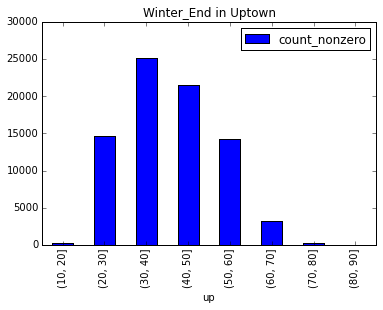

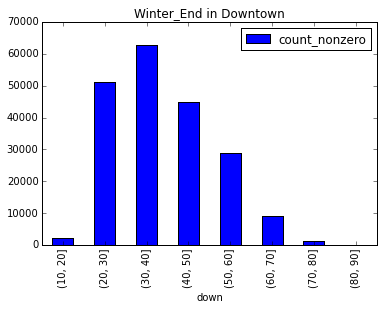

In [49]:
bins = np.arange(10, 99, 10)
df_W.up.groupby(pd.cut(df_W.up, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter_End in Uptown")
up_dist = df_W.up.groupby(pd.cut(df_W.up, bins)).agg([count_nonzero])
df_W.down.groupby(pd.cut(df_W.down, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter_End in Downtown")
down_dist = df_W.down.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])

In [50]:
t = df_W.up     #for the K-S test, no matter the scale is, the result remains the same
t = t[~numpy.isnan(t)]

t1 = df_W.down
t1 = t1[~numpy.isnan(t1)]

print scipy.stats.ks_2samp(t, t1)

Ks_2sampResult(statistic=0.091251506320367104, pvalue=0.0)


# Using the two samples K-S test, The Null hypothesis is rejected and they are NOT derived from the same distribution.